In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import glob
import matplotlib.pyplot as plt


## MDTB as training dataset
MDTB dataset is used for training the models. 

In [2]:
df=rm.comb_eval(models=['MDs1'])

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval'>

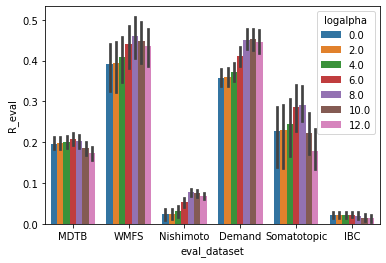

In [3]:
sns.barplot(data=df,x='eval_dataset',y='R_eval',hue='logalpha')

<AxesSubplot:xlabel='eval_dataset', ylabel='noiseceiling_XY'>

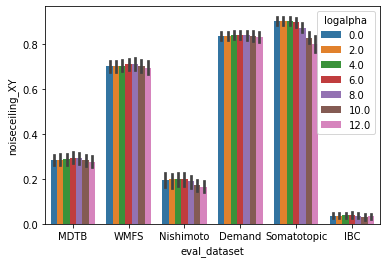

In [4]:
sns.barplot(data=df,x='eval_dataset',y='noiseceiling_XY',hue='logalpha')

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval_adj'>

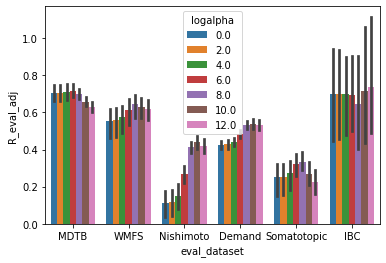

In [5]:
sns.barplot(data=df,x='eval_dataset',y='R_eval_adj',hue='logalpha')

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval_adj'>

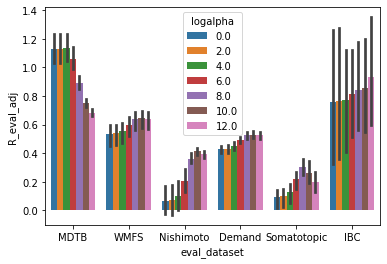

In [6]:
dfall=rm.comb_eval(models=['MD'])
sns.barplot(data=dfall,x='eval_dataset',y='R_eval_adj',hue='logalpha')

##  All training data sets

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval'>

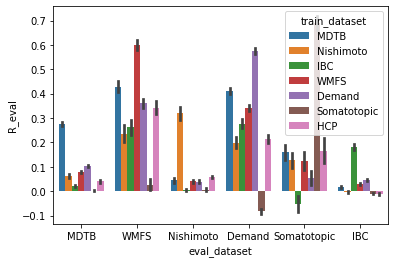

In [7]:
dfall=rm.comb_eval(models=['Md','Ni','Ib','Wm','De','So','Hc'])
sns.barplot(data=dfall,x='eval_dataset',y='R_eval',hue='train_dataset')

In [8]:
dfall.to_csv('evaluation_results.csv')


In [9]:
dfall['nanY']=np.isnan(dfall.noiseceiling_Y)
dfall['nanXY']=np.isnan(dfall.noiseceiling_XY)
dfall['nanXR']=np.isnan(dfall.noise_X_R)



In [10]:
pd.pivot_table(data=dfall,index='train_dataset',columns='eval_dataset',values='nanXR',aggfunc='sum')

eval_dataset,Demand,IBC,MDTB,Nishimoto,Somatotopic,WMFS
train_dataset,,,,,,
Demand,0,7,0,0,0,0
HCP,12,69,0,0,1,10
IBC,0,15,0,0,0,0
MDTB,0,5,0,0,0,0
Nishimoto,0,18,0,0,0,0
Somatotopic,0,36,0,0,0,0
WMFS,0,0,0,0,2,0


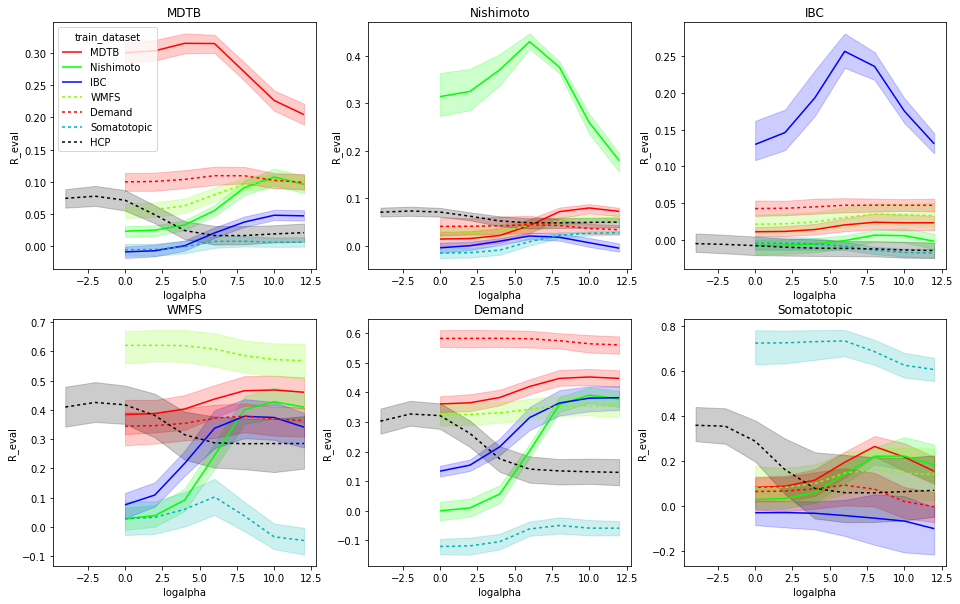

In [15]:
plt.figure(figsize=(16,10))
evd=['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic']
ho = ['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic','HCP']
palette = [[1,0,0],[0,1,0],[0,0,1],[0.5,1,0],[1,0,0],[0,0.7,0.7],[0,0,0]]
dashes = [[1,0],[1,0],[1,0],[2,2],[2,2],[2,2],[2,2]]

for i,ed in enumerate(evd):
    ax=plt.subplot(2,3,i+1)
    d=dfall[dfall.eval_dataset==ed]
    plt.title(ed)
    if i==0:
        sns.lineplot(data=d,y='R_eval',x='logalpha',hue='train_dataset',palette=palette,style='train_dataset',hue_order=ho,dashes=dashes)
    else: 
        sns.lineplot(data=d,y='R_eval',x='logalpha',hue='train_dataset',palette=palette,style='train_dataset',hue_order=ho,dashes=dashes,legend=None)


TODO: 
* Fit high log-alpha.... 
* Crossvalidate models on their own dataset across subjects

<AxesSubplot:xlabel='logalpha', ylabel='R_eval'>

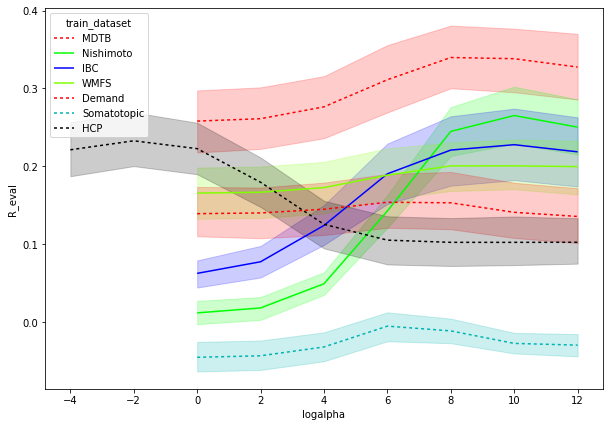

In [16]:
# Plot all evaluations on different datasets 
plt.figure(figsize=(10,7))
d=dfall[dfall.train_dataset!=dfall.eval_dataset]
sns.lineplot(data=d,y='R_eval',x='logalpha',hue='train_dataset',hue_order=ho,palette=palette,style='train_dataset',dashes=dashes)


In [19]:
# determine best logalpha for each model 
pd.pivot_table(d,index=['train_dataset'],columns=['logalpha'],values=['R_eval'],aggfunc='mean')

R_eval                                                    \
logalpha          -4.0      -2.0       0.0       2.0       4.0       6.0    
train_dataset                                                               
Demand              NaN       NaN  0.139100  0.140063  0.144836  0.153812   
HCP            0.221187  0.232746  0.222668  0.179499  0.125431  0.105120   
IBC                 NaN       NaN  0.062418  0.077329  0.124013  0.190357   
MDTB                NaN       NaN  0.258065  0.261148  0.276385  0.311227   
Nishimoto           NaN       NaN  0.011641  0.017989  0.049087  0.142614   
Somatotopic         NaN       NaN -0.045431 -0.043482 -0.032137 -0.005381   
WMFS                NaN       NaN  0.165542  0.166652  0.172615  0.188624   

                                             
logalpha           8.0       10.0      12.0  
train_dataset                                
Demand         0.153080  0.140865  0.135538  
HCP            0.102282  0.102265  0.102380  
IBC            0.220852  0.227731  0.218588  
MDTB           0.339783  0.338223  0.327487  
Nishimoto      0.244870  0.265234  0.250303  
Somatotopic   -0.011481 -0.027564 -0.029781  
WMFS           0.200525  0.200565  0.199595

In [23]:
A = pd.pivot_table(d,index=['train_dataset'],columns=['logalpha'],values=['R_eval'])
B = np.nan_to_num(A.values)
ind = B.argmax(axis=1)
A.columns[ind]

MultiIndex([('R_eval',  6.0),
            ('R_eval', -2.0),
            ('R_eval', 10.0),
            ('R_eval',  8.0),
            ('R_eval', 10.0),
            ('R_eval', -4.0),
            ('R_eval', 10.0)],
           names=[None, 'logalpha'])